# Open UK datasets related to environment

The goal of this project is to use available datasets found in the gov.co.uk website, all related to environment, to improve python exploratory analysis by importing from different types of files, binding datasets together, and ploting different views.


## Other Species conditions

This dataset contains, per 2 month bins, details about conditions for other animals than the standard chicken / pork / beef.

The goals of this exercise are:

1. To import different csv files via a function
2. Bin the outputs together
3. Plot the evolution of the conditions and other boxplots


In [1]:
# import all the necessary python packages -----
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
# function to read one of the csv files
def read_condition (path):
    ###

    ###

    temp = pd.read_csv(path)

    # clean the name of the columns to make sure they have the same name, before binding the tables
    temp.columns = ['Species', 'InspectionType', 'Condition', 'YearMonth', 'Country',
       'NumberOfConditions', 'Throughput', 'NumberOfThroughputPlants',
       'PercentageOfThroughput']

    temp.YearMonth = pd.to_datetime(temp.YearMonth, format = "%Y-%m")

    # clean the columns that have different values
    temp.InspectionType[temp.InspectionType == "Carcases"] = "Carcase"
    temp.InspectionType[temp.InspectionType == "Total Rejections"] = "TotalRejection"
    temp.InspectionType[temp.InspectionType == "Total Rejection"] = "TotalRejection"
    
    temp.Condition[temp.Condition == "Abnormal Smell, Colour"] = "Abnormal Smell Colour"
    temp.Condition[temp.Condition == "Abnormal Smell  Colour"] = "Abnormal Smell Colour"
    temp.Condition[temp.Condition == "Abscesses ??? Forequarters"] = "Abscesses – Forequarters"
    temp.Condition[temp.Condition == "Abscesses ??? Hindquarters"] = "Abscesses – Hindquarters"
    temp.Condition[temp.Condition == "Ascites/Oedema"] = "Ascites-Oedema"
    temp.Condition[temp.Condition == "Bruising  Traumatic"] = "Bruising - Traumatic"
    temp.Condition[temp.Condition == "Bruising ? Traumatic"] = "Bruising - Traumatic"
    temp.Condition[temp.Condition == "Bruising – Traumatic"] = "Bruising - Traumatic"
    temp.Condition[temp.Condition == "Emaciation/Cachexia"] = "Emaciation-Cachexia"
    temp.Condition[temp.Condition == "Fascioliasis (Fluke)"] = "Fascioliasis (fluke)"
    temp.Condition[temp.Condition == "Lameness - Foot Lesion(s)"] = "Lameness – Foot Lesion(s)"
    temp.Condition[temp.Condition == "Lameness - Joint Lesion(s)"] = "Lameness – Joint/Leg Lesion(s)"
    temp.Condition[temp.Condition == "Lameness ??? Joint/Leg Lesion(s)"] = "Lameness – Joint/Leg Lesion(s)"
    temp.Condition[temp.Condition == "Lameness ??? Not Defined"] = "Lameness – Not Defined"
    temp.Condition[temp.Condition == "Notifiable: TB, Anthrax, Foot and Mouth"] = "Notifiable: TB - Anthrax - Foot and Mouth"
    temp.Condition[temp.Condition == "Oedema / Emaciation"] = "Oedema - Emaciation"
    temp.Condition[temp.Condition == "Oedema/Emaciation"] = "Oedema - Emaciation"
    temp.Condition[temp.Condition == "Peritonitis/Perihepatitis"] = "Peritonitis-Perihepatitis"

    # recalculate the percentage correctly
    temp.PercentageOfThroughput = temp.NumberOfConditions / temp.NumberOfThroughputPlants
    return(temp)


In [93]:
list_of_files = glob.glob("Data/other_species_conditions/*.csv")
condition_df = pd.concat(map(read_condition, list_of_files))

In [96]:

print(condition_df.head())

print("\nTypes per column:")
print(condition_df.dtypes)
print("\nChoices of Inspection type")
print(condition_df.InspectionType.value_counts())
print("\nChoices of conditions")
print(condition_df.Condition.value_counts().sort_index(ascending=True).to_string())
print("\nChoices of Country")
print(condition_df.Country.value_counts())

  Species InspectionType                       Condition  YearMonth  Country  \
0  Cattle     AnteMortem    Emergency Slaughter on Farm  2020-04-01  England   
1  Cattle     AnteMortem    Emergency Slaughter on Farm  2020-05-01  England   
2  Cattle     AnteMortem    Emergency Slaughter on Farm  2020-06-01  England   
3  Cattle     AnteMortem  Lameness – Joint/Leg Lesion(s) 2020-06-01  England   
4  Cattle        Carcase        Abscesses – Forequarters 2020-04-01  England   

   NumberOfConditions  Throughput  NumberOfThroughputPlants  \
0                  21      114574                       127   
1                   8      112022                       126   
2                   5      140827                       125   
3                   1      140827                       125   
4                   1      114574                       127   

   PercentageOfThroughput  
0                   0.018  
1                   0.007  
2                   0.004  
3                   0.001  


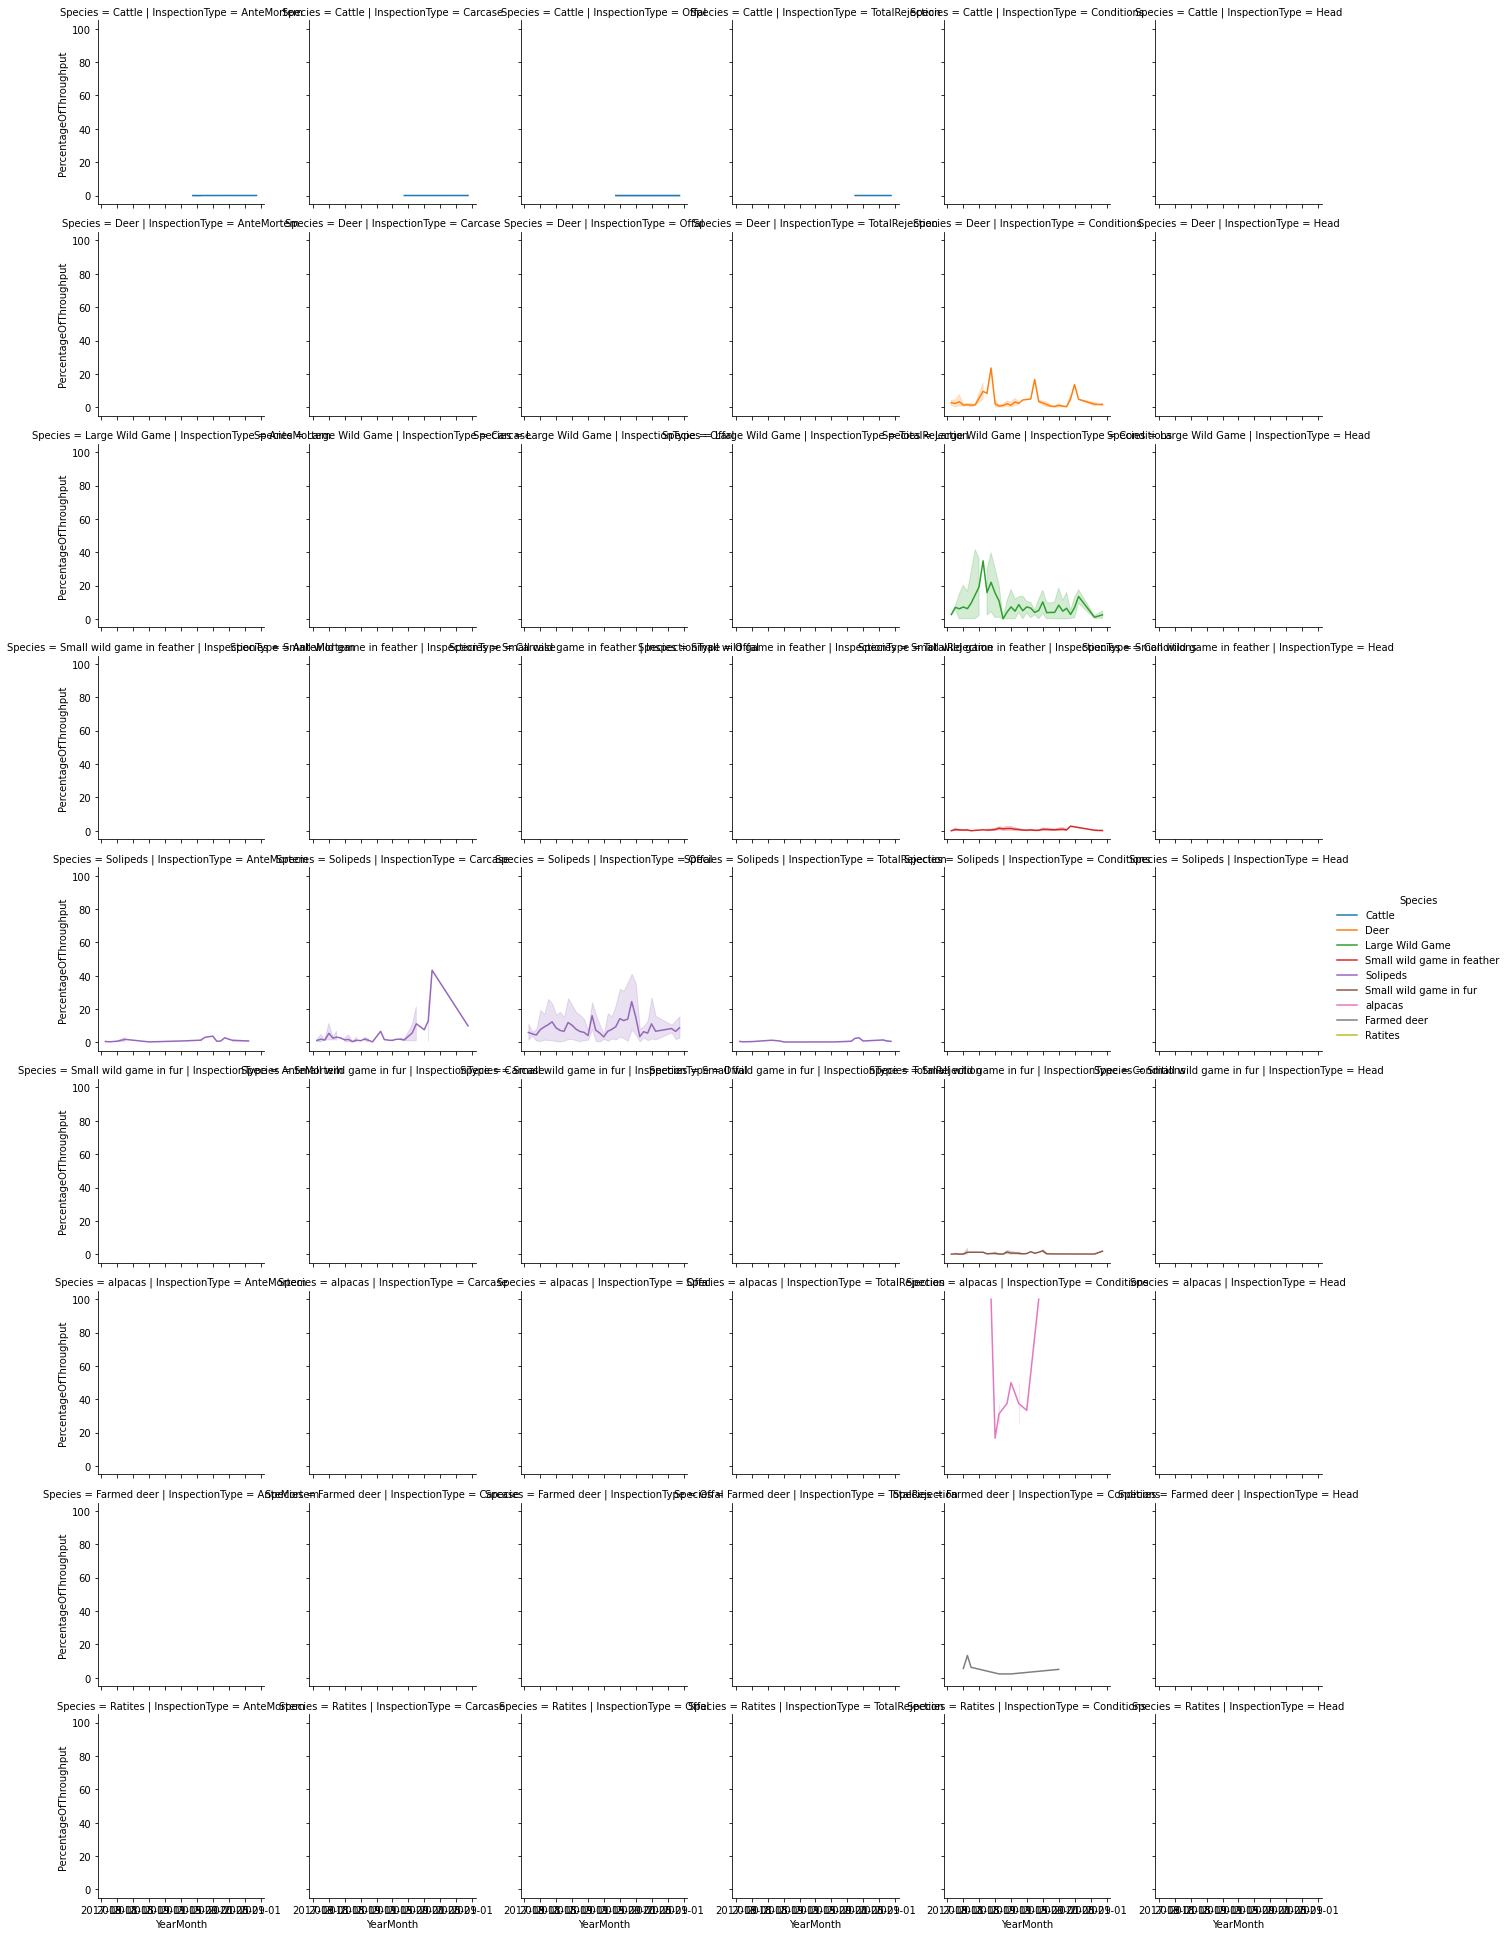

In [112]:
df = condition_df[condition_df.Country == "England"]
g = sns.FacetGrid(df, col="InspectionType",
                row = "Species", hue = "Species")
g.map(sns.lineplot, 
                "YearMonth", 
                "PercentageOfThroughput")
g.add_legend()

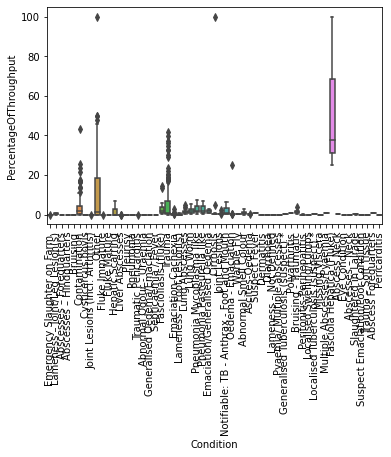

In [119]:
ax = sns.boxplot(data = df, x = "Condition", y = "PercentageOfThroughput")
plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

## Waste data
This dataset, in an excel spreasheet, contains 9 datasets related to waste in the UK:

1. Waste from Households, UK and country split
2. Municipal Waste and BMW to Landfill, along with BMW to landfill as % of 1995 target baseline, UK and country split
3. Municipal waste and biodegradable municipal waste (BMW) to landfill, by main waste types, UK and country split
4. Recovery Rate from Non-Hazardous Construction and Demolition Waste, UK and England
5. Total waste generation from the commercial and industrial sectors, UK and England
6. Total generation of waste, split by NACE economic activity and EWC-STAT waste material, UK and England
7. Total waste sent to final treatment, split by method of treatment and EWC-STAT waste material, UK and England
8. Number and Capacity of Permitted Final Treatment Facilities, UK and England
9. Packaging waste and recycling / recovery, split by material, UK 


In [123]:
pd.read_excel("Data/waste/UK_Waste_Mar2020.xlsx",sheet_name = "Table11", skiprows = 7, nrows= 35)

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.